In [18]:
%matplotlib inline
import msprime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import SVG

We want to approximate the SFS. We simulate 10000 replicates, each consisting of a sample of size n=10 taken from a single panmictic population. We assume a history of an instaneous bottleneck at time T and explore a range of strength parameters.

In [87]:
Nrep = 10000
nsamp = 10
Ne = 1
T = 0.5
slist= np.array([0,1,2,3])

row = 0
data = {}
for s in slist: 
    demographic_events = [msprime.InstantaneousBottleneck(time=T, strength=s)]
    reps = msprime.simulate(sample_size=nsamp, Ne=Ne, num_replicates = Nrep, demographic_events = demographic_events)
    B = np.zeros((Nrep, nsamp))
    for rep_index, ts in enumerate(reps):
        tree = next(ts.trees())
        for u in tree.nodes():
            nleaves = tree.num_samples(u)
            if tree.parent(u) != msprime.NULL_NODE:
                B[rep_index, nleaves]+=tree.branch_length(u)    
    data[s] = np.mean(B, axis=0)
    data[s] /=np.sum(data[s])

The site frequency spectrum (SFS) can be approximated by taking the average length of branches with n leafnodes across simulation replicates. With increasing bottleneck strength the SFS becomes increasingly skewed. However, the effect is complex; e.g. while the relative frequency of singleton branches increases, other frequency classes (e.g. doubleton) have a non-monotonic relationship with bottleneck strength:

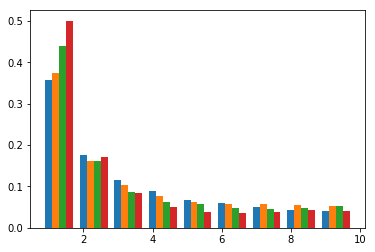

In [89]:
bar_width=0.2
index = np.arange(1, nsamp)
j = 0
for s, B in data.items():
    plt.bar(index + j * bar_width, B[1:], bar_width, label=str(s))
    j += 1

How does the approximate SFS compare to analytic expectation? For a population of constant size, the SFS is simply given by 1/i (Watterson's correction factor):

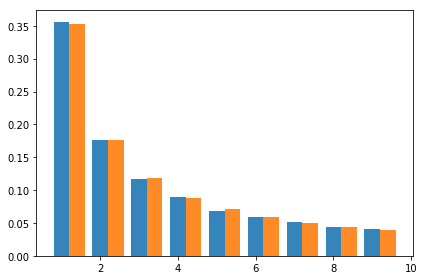

In [90]:
expsfs=[(1/i) for i in range(1,10)]
expsfs/=np.sum(expsfs)

fig, ax = plt.subplots()
index = np.arange(1,10)
bar_width = 0.4
opacity = 0.9

simsfs = ax.bar(index, data[0][1:], bar_width, alpha=opacity, label='sim')
expextsfs = ax.bar(index+ bar_width, expsfs, bar_width, alpha=opacity, label='exp')

fig.tight_layout()
plt.show()

The analyic prediction under a bottleneck model is more cumbersome (Bunnefeld et al. 2015, see Appendix). For a sample of n=4 lineages the SFS is:

In [122]:
t=1
T=2

expsfsBottl=[
    2/15*(15 + 9 *np.exp(-t - T) - np.exp(-6*T) - 5*np.exp(-3*T) - 9*np.exp(-T) + 
    np.exp(-6*(t + T)) + 5*np.exp(-3*(t + T))), 
    1/5*(5 + 6*np.exp(-t - T) + np.exp(-6*T) - 6*np.exp(-T) - np.exp(-6*(t + T))),
    2/15*np.exp(-6*(t + T))*(1 - np.exp(6*t) - 5*np.exp(3*(t + T)) + 
    9*np.exp(5*(t + T)) + 5*np.exp(6*(t + T)) + 5*np.exp(6*t + 3*T) - 
    9*np.exp(6*t + 5*T))]

expsfsBottl/=np.sum(expsfsBottl)
print(expsfsBottl)

[ 0.5644372   0.26717043  0.16839237]


In [126]:
Nrep = 10000
nsamp = 4
Ne = 1
T = 2
slist= [0,1]

row = 0
data4 = {}
for s in slist: 
    demographic_events = [msprime.InstantaneousBottleneck(time=T, strength=s)]
    reps = msprime.simulate(sample_size=nsamp, Ne=Ne, num_replicates = Nrep, demographic_events = demographic_events)
    B = np.zeros((Nrep, nsamp))
    for rep_index, ts in enumerate(reps):
        tree = next(ts.trees())
        for u in tree.nodes():
            nleaves = tree.num_samples(u)
            if tree.parent(u) != msprime.NULL_NODE:
                B[rep_index, nleaves]+=tree.branch_length(u)    
    data4[s] = np.mean(B, axis=0)
    data4[s] /=np.sum(data4[s])
print(data4[1][1:])

[ 0.57208629  0.26705839  0.16085532]


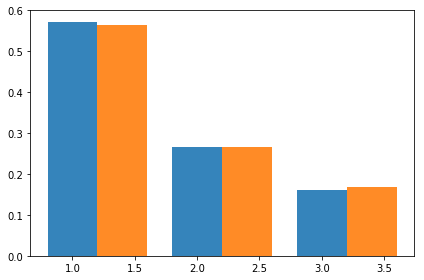

In [127]:
expsfsBottl/=np.sum(expsfsBottl)

fig, ax = plt.subplots()
index = np.arange(1,4)
bar_width = 0.4
opacity = 0.9

simsfs = ax.bar(index, data4[1][1:], bar_width, alpha=opacity, label='sim')
expextsfs = ax.bar(index+ bar_width, expsfsBottl, bar_width, alpha=opacity, label='exp')

fig.tight_layout()
plt.show()